<a href="https://colab.research.google.com/github/Archipatel1296/Social-Work/blob/main/S%26P_500_A_Numbers_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&P 500: A Numbers Game
#### By: Archi Patel (018209919) and Ayush Mahajan (017617054)

# Introduction
Through this project we are trying to find the best investments that can be made in S&P 500 Companies. We will do this using 3 methods:   

1) Correlation: By finding out whether there exists a correlation between the number of full time employees in a company and the company's marketcap    

2) One-Way ANOVA: Using a one-way ANOVA, i.e. Analysis of Variance, we will try to check for statistical significance between market sectors.  

3) Regression: Lastly, by relating a company's revenue growth and marketcap, we will use regression to find a pattern.

#The Dataset  
This is the dataset containing the S&P 500 companies. This is what we will use for all our calculations.   
We first import all the needed modules for this project.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

Descriptions of this dataset:

- `Exchange`: Exchange where its stocks are negotiated
- `Symbol`: Stock symbol
- `Shortname`: Company short name
- `Longname`: Company long name
- `Sector`: Sector where the company operates
- `Industry`: Industry, within a sector, where the company operates.
- `Currentprice`: Current stock price
- `Marketcap`: Current marketcap
- `Ebitda`: Earnings before interest, taxes, depreciation and amortization
- `Revenuegrowth`: Revenue growth
- `City`: City
- `State`: State
- `Country`: Country
- `Fulltimeemployees`: Number of full time employees
- `Longbusinesssummary`: Summary of the company
- `Weight`: Percentage of participation on the S&P index (marketcap %)

In [ ]:
url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/sp500_companies.csv'
df = pd.read_csv(url)

df.head() #Prints the first 5 rows of the datset

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,155.74,2502866501632,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.072117
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,235.87,1770907107328,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.051026
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.58,1248045432832,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,96.29,1248043597824,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.035961
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,103.41,1054957895680,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.030397


‎

______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

‎

#Testing the Correlation Between Full Time Employees and the Company's Marketcap  
  

## Our Hypotheses:
### Null Hypothesis $H_o$
"There is no significant correlation between a company's number of full-time employees and its marketcap"
### Alternative Hypothesis $H_A$
"There is a significant, positive correlation between a company's number of full-time employees and its marketcap"

### Removing Outliers
First, we remove the outliers. An outlier is a data point that significantly deviates from the rest of a dataset by being unusually high or low compared to other observations
### To Identify Outliers,
We check whether it meets either of the following conditions:  

*   $\large <= Q1 - (1.5 * IQR)$  
*   $\large >= Q3 + (1.5 * IQR)$

Q1 and Q3 are the first and third quartiles respectively. The IQR, or the Interquartile Range is $Q3 - Q1$

In [ ]:
#Separating the columns that we need to test on
emp = df['Fulltimeemployees']
mcap = df['Marketcap']

In [ ]:
'''#First, we remove any empty/NaN rows, as these will hamper the results.
emp.dropna(inplace = True)
Setting inplace = True directly modifies the dataframe.
mcap.dropna(inplace = True)'''

#Calculating Q1 and Q3 for both columns, along with their IQRs
emp_q1 = np.percentile(emp.dropna(), 25)
emp_q3 = np.percentile(mcap.dropna(), 75)
emp_IQR = emp_q3 - emp_q1

mcap_q1 = np.percentile(mcap, 25)
mcap_q3 = np.percentile(mcap, 75)
mcap_IQR = mcap_q3 - mcap_q1

#Now, to remove the outliers
emp_clean = emp[(emp >= emp_q1 - 1.5 * emp_IQR) & \
                (emp <= emp_q3 + 1.5 * emp_IQR)].dropna()

mcap_clean = mcap[(mcap >= mcap_q1 - 1.5 * mcap_IQR) & \
                  (mcap <= mcap_q3 + 1.5 * mcap_IQR)].dropna()

# Now, we concatenate (the columns) of this data. This means that the columns
# are joined, making sure that the data is not misalligned.
clean_data = pd.concat([emp_clean, mcap_clean], axis = 1, join = 'inner')

print(f"Sucessfully removed {len(df) - len(clean_data)} outliers \n")
print(clean_data.head(5))

Sucessfully removed 63 outliers 

    Fulltimeemployees     Marketcap
58            30452.0  127707316224
59           216000.0  124336455680
60           282100.0  124149276672
61            13500.0  122268688384
62            75550.0  121994469376


### Testing Pearson Correlation
Now that we have the cleaned data, free of outliers and NaNs, we can perform tests. First, we perform the Pearson Correlation Test.  
The Pearson correlation measures both the strength and direction of linear relationships between quantitative variables, requiring that the variables be measured on interval or ratio scales and have a non-curvilinear relationship with a wide range of potential values.   
The correlation coefficient ranges from -1.00 to +1.00, where the sign indicates whether the relationship is positive or negative linear. The absolute value of the correlation coefficient indicates the strength of the linear relationship between the variables, while the degree of linearity is measured by how closely the relationship follows a straight line.

In [ ]:
# Performing the P-test
c_coeff, p_value = pearsonr(clean_data['Fulltimeemployees'], clean_data['Marketcap'])
print(f"The Correlation Coefficient is {c_coeff:.4f}. Thus, we see that there is a strong correlation")
print(f"The p-value is {p_value:.4e}")


The Correlation Coefficient is 0.3264. Thus, we see that there is a strong correlation
The p-value is 3.7102e-12


Since the correlation coefficient is 0.3264, i.e. Positive, we see that there is a strong correlation between the marketcap and full time employees.

### Testing the Hypothesis


In [ ]:
# Testing the Hypothesis
if p_value < 0.05:
  print("Null hypothesis is rejected: There is a significant correlation")
else:
  print("Fail to reject null hypothesis: There is no significant correlation")

Null hypothesis is rejected: There is a significant correlation


We see that since the p-value is less than 0.05, there is a significant correlation. Thus, we can reject the null hypothesis.

### Visualizing the data
We now use Seaborn and PyPlot to visualize the data

<Axes: xlabel='Fulltimeemployees', ylabel='Marketcap'>

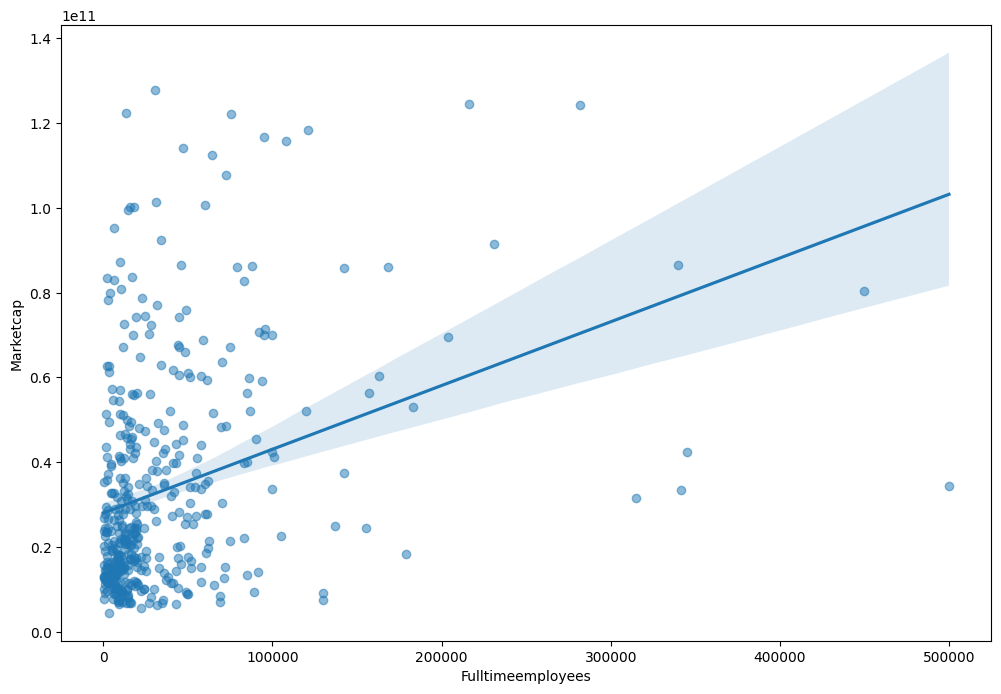

In [ ]:
# Visualizing the data
plt.figure(figsize=(12, 8))
sns.regplot(data = clean_data, x = 'Fulltimeemployees', y = 'Marketcap', ci = 90, scatter_kws={'alpha': 0.5})
#ci = 90 sets the confidence interval to 90%. We do this because because the dataset is quite small, less than 500 companies.
#scatterkws function makes the scatter points translucent to indicate overlapping points better

###**Conclusion**  
We accept the alternative hypothesis that suggests that a there exists a correlation between the marketcap and number of full time employees.   
While a larger dataset must be used to make more accurate observations, we see that a higher number of full time employees generally means a larger marketcap.



‎

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

‎

# Using a One Way ANOVA to Find Statistical Signficance Between Market Sectors

## Null Hypothesis
"There is no statistical significance between the various sectors of the dataframe"

## Alternate Hypothesis
"There is a statistical significance between the various sectors of the dataframe"

### Making a New DF with Sectors as Columns and Currentprice as Rows
We do this to make iterating through the dataframe easier, and so that we only have to deal with the data that is useful for performing this test.

In [ ]:
sector_df = pd.DataFrame()

sectors = df['Sector'].unique()

# Loop through unique sectors and add each as a column
for i in sectors:
    sector_df[i] = df[df['Sector'] == i]['Currentprice'].reset_index(drop=True)

sector_df.head() # Display the first few rows

,Technology,Communication Services,Consumer Cyclical,Financial Services,Healthcare,Energy,Consumer Defensive,Utilities,Basic Materials,Industrials,Real Estate
0,155.74,96.58,103.41,299.63,551.24,110.70,142.51,79.03,301.80,167.17,204.71
1,235.87,96.29,298.65,126.08,174.87,179.98,135.22,94.00,226.23,95.08,112.98
2,138.34,105.95,228.52,329.47,359.90,127.17,60.76,66.34,254.44,204.93,132.50
3,77.36,151.00,274.52,36.18,47.43,133.69,182.23,69.41,66.02,484.87,311.54
4,45.64,37.67,93.83,46.35,147.61,50.45,510.87,152.39,32.20,198.65,568.05


### Grand Mean
While the next step to calculate a one-way ANOVA is to calculate the Grand Mean, we first create 2 loops to find the mean of each group. Since it is not feasible to create 11 variables for each mean and another 11 for the sample size, we use a loop. This makes the program much more efficient.   
By using the loop, we create lists of the means and sample sizes of each group. These do not include NaN values. We call the sum of these the grand_sum and grand_num



In [ ]:
grand_sum = 0
nk = []

for y in sectors:
  grand_sum += sector_df[y].sum()

for z in sectors:
  nk.append(sector_df[z].count())

grand_num = sum(nk)
print("List of Sample Sizes", nk)
print("Grand Sum", round(grand_sum,2))
print("Total Number of Elements/Grand Num:", grand_num)

grand_mean = grand_sum/grand_num

print("Grand Mean:",round(grand_mean,2))

List of Sample Sizes [71, 22, 57, 67, 64, 23, 36, 29, 21, 71, 32]
Grand Sum 80070.61
Total Number of Elements/Grand Num: 493
Grand Mean: 162.42


xk is the list containing the means.  
nk is the list containing the sample sizes.

In [ ]:
xk = []

for x in sectors:
  xk.append(sector_df[x].mean())

print("Mean List:", [round(num, 2) for num in xk]) #Displaying rounded means but keeping the original means in the backend

Mean List: [163.6, 84.84, 285.93, 140.0, 215.48, 88.26, 115.23, 70.07, 135.35, 174.34, 115.25]


## Finding the Squared Deviations and Sum of Squares
We write a function to make the calculations easier

In [ ]:
def squared_dev(values_list, mean):
  sq_dev = []
  for xi in values_list:
    sq_dev.append((xi - mean)**2)

  return sq_dev

###Finding SS_Between
SS_Between, also known as Sum of Squares Between or Between Group Variation, represents the variation among sample means. It quantifies the differences between group means and the overall grand mean  
Since the sample sizes are different:  
$\large SS_{between}$ = $\large \sum{n_k (\bar{x}_k - \bar{x}_G})^2$  


In [ ]:
sq_dev = squared_dev(xk, grand_mean)

# we need to multiply sq_dev[0] with nk[0], then sq_dev[1] with nk[1]...etc
temp = []
for h in range(len(nk)): # h = 0,1,2,3
  temp.append(sq_dev[h]*nk[h])

ss_between = sum(temp)
print(f"SS_between: {ss_between:.2f}")

SS_between: 1766572.91


### Finding SS_Within
SS_Within, also called Sum of Squares Within or Within Group Variation, represents the variation within individual samples or groups  
$\large SS_{within}$ = $\Large \sum(x_i - \bar{x}_k)^2$  


In [ ]:
ss_within = 0

for j in sectors:
  ss_within += sum(sector_df[j].dropna())

print(f"SS_Within: {ss_within:.2f}")

SS_Within: 80070.61


## Finding Degrees of Freedom
$\large df_{between}$ = $\large k-1$  
df_between, also known as degrees of freedom for the numerator, represents the degrees of freedom associated with the variation between groups.  

  
$\large df_{within}$ = $\large N-k$  
df_within, also called degrees of freedom for the denominator or error degrees of freedom, represents the degrees of freedom associated with the variation within groups.

In [ ]:
k = len(sectors)
df_between = k - 1

# We have already calculated N as the grand_num. This was done to avoid creating many varaibles.
df_within = grand_num - k

print(f"df_between: {df_between}")
print(f"df_within: {df_within}")

df_between: 10
df_within: 482


## Finding Mean Squares for Within and Between
$\large SS_{between} / df_{between}$ = $\large MS_{between}$  

<br>

$\large SS_{within} / df_{within}$ = $\large MS_{within}$

In [ ]:
ms_between = ss_between / df_between
ms_within = ss_within / df_within

print(f"MS_between: {ms_between:.2f}")
print(f"MS_within: {ms_within:.2f}")

MS_between: 176657.29
MS_within: 166.12


### Finding the F-Statistic
The F-Statistic is a test statistic used to determine if there are significant differences between group means in ANOVA  
$F$ = $\Large\frac{MS_{between}}{MS_{within}}$

In [ ]:
F = ms_between / ms_within
print(f"F-statistic: {F:.2f}")

F-statistic: 1063.42


### Finding the F-Critical Value using an F-Table and an $\alpha$ level of 0.05
F critical value is a threshold value used to determine whether the F-Statistic is statistically significant.

In [ ]:
F_crit = 1.831

### Comparing F-statistic with F-critical value to decide whether to reject or retain the null hypothesis

In [ ]:
if F > F_crit:
  print('Reject the null')
else:
  print('Retain the null')

Reject the null


#**Conclusion**
Since the null hypothesis was rejected, in favor of the alternate one, it means that there is a statistical significance between all the various sectors in the dataframe of S&P 500 companies.  


*   F-Critical > F-Statistic
*   This means that the null hypothesis is rejected
*   Thus, there is a statistical significance between the sectors of the various companies.  
*   It may be beneficial to diversify investments amongst sectors to increase returns.



‎

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

‎

# Finding the Relation between Company's Revenue Growth and Marketcap Using Regression

We want to find out using regression:  
Does a higher market value result in a higher revenue growth?  
Which one do we invest in? A company with lower market cap or higher market cap?

###Cleaning up the Data
First, we remove the NaN values as these will interfere with our calculations

In [ ]:
#Droping missing values from dataframe
df = df.dropna(subset=['Marketcap', 'Revenuegrowth'])

### Removing Outliers
We then remove outliers to achieve more accuracy with out results.  
We check whether it meets either of the following conditions:  

*   $\large <= Q1 - (1.5 * IQR)$  
*   $\large >= Q3 + (1.5 * IQR)$

Q1 and Q3 are the first and third quartiles respectively. The IQR, or the Interquartile Range is $Q3 - Q1$

In [ ]:
Revenuegrowth_q1 = df['Revenuegrowth'].quantile(0.25)
Revenuegrowth_q2 = df['Revenuegrowth'].median()
Revenuegrowth_q3 = df['Revenuegrowth'].quantile(0.75)

Revenuegrowth_iqr = Revenuegrowth_q3 - Revenuegrowth_q1

marketcap_lb =  Revenuegrowth_q1 - 1.5 * Revenuegrowth_iqr
marketcap_ub =  Revenuegrowth_q3 - 1.5 * Revenuegrowth_iqr

df1 = df[(df['Revenuegrowth'] >= marketcap_lb) & (df['Revenuegrowth'] <= marketcap_ub)]

# To get dataframe without outliers
df1.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
10,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks—Diversified,126.08,381813096448,NaN,-0.096,New York,NY,United States,278494.0,JPMorgan Chase & Co. operates as a financial s...,0.011001
46,NYQ,MS,Morgan Stanley,Morgan Stanley,Financial Services,Capital Markets,82.22,147536396288,NaN,-0.117,New York,NY,United States,78386.0,"Morgan Stanley, a financial holding company, p...",0.004251
54,NYQ,LMT,Lockheed Martin Corporation,Lockheed Martin Corporation,Industrials,Aerospace & Defense,484.87,133720350720,7.152000e+09,-0.093,Bethesda,MD,United States,114000.0,"Lockheed Martin Corporation, a security and ae...",0.003853
72,NYQ,BLK,"BlackRock, Inc.","BlackRock, Inc.",Financial Services,Asset Management,663.75,100072914944,7.407000e+09,-0.146,New York,NY,United States,18400.0,"BlackRock, Inc. is a publicly owned investment...",0.002883
114,NYQ,USB,U.S. Bancorp,U.S. Bancorp,Financial Services,Banks—Regional,42.86,63552806912,NaN,-0.073,Minneapolis,MN,United States,70000.0,"U.S. Bancorp, a financial services holding com...",0.001831


### Calculating p-value and Pearson Correlation Coefficient
To do this, we use the scipy stats library.

In [ ]:
pearson_corr, p_value = stats.pearsonr(df['Revenuegrowth'], df['Marketcap'])

print(f'Pearson correlation coefficient between Revenuegrowth (Independent variable) and Marketcap (dependent variable) is {round(pearson_corr,3)}')
print(f'p_value for Revenuegrowth and Marketcap is {round(p_value,3)}')

Pearson correlation coefficient between Revenuegrowth (Independent variable) and Marketcap (dependent variable) is -0.021
p_value for Revenuegrowth and Marketcap is 0.643


A negative, or inverse correlation, between two variables, indicates that one variable increases while the other decreases, and vice versa.

### Calculating Standard Deviation

In [ ]:
std_Revenuegrowth_x = df1['Revenuegrowth'].std()
print(round(std_Revenuegrowth_x, 2))
std_marketcap_y = df1['Marketcap'].std()
print(round(std_marketcap_y, 2))


0.04
63270331155.23


### Calculating R

In [ ]:
r_Revenuegrowth_Marketcap	= df['Revenuegrowth'].corr(df['Marketcap'])
r_Revenuegrowth_Marketcap = round(r_Revenuegrowth_Marketcap,2)
print( 'Revenue growth and marketcap is ',r_Revenuegrowth_Marketcap)

Revenue growth and marketcap is  -0.02


### Calculating the Slope of the Best-Fit Line
We use the generic form for the line’s equation $y=mx + b$, where $m$ is the slope and $b$ is the y-intercept. The slope is $m = r(\large\frac{S_{y}}{S_{x}})$. We already found $r$ in step 1. In this step, we will find the standard deviation, ${S_x}$ and ${S_y}$.

We can say that $\hat{y} = r(\frac{S_{y}}{S_{x}})x+ b$


In [ ]:
m = r_Revenuegrowth_Marketcap * (std_Revenuegrowth_x/ std_marketcap_y)
print(f'The Slope of the graph is {m}')

The Slope of the graph is -1.3085020736044818e-14


We see that the slope is negative, however, it is very small

In [ ]:
mean_Revenuegrowth_x = df['Revenuegrowth'].mean()
round(mean_Revenuegrowth_x, 2)
mean_marketcap_y = df['Marketcap'].mean()
round(mean_marketcap_y, 2)
print(mean_Revenuegrowth_x)
print(mean_marketcap_y)


0.6103569979716025
70308670721.55782


### Finding the y-intercept

In [ ]:
# y = (m * x) + b
# b = y - (m * x)
b = mean_marketcap_y - (m * mean_Revenuegrowth_x)

print(round(b,2))

70308670721.56


### Graph the Best-Fit Line

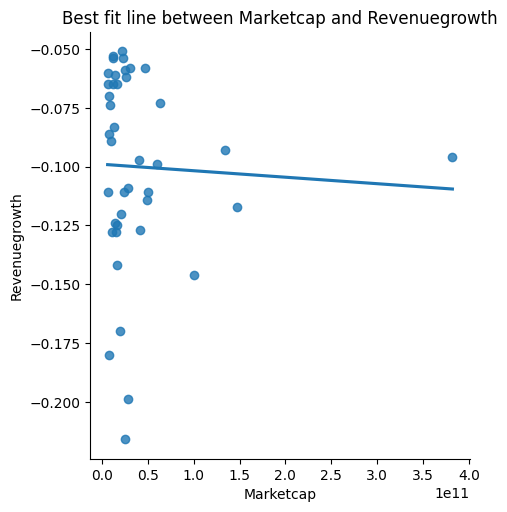

In [ ]:
sns.lmplot(
    data=df1,
    x='Marketcap',
    y='Revenuegrowth',
    ci=None # You can turn off the confidence interval by setting ci=None
).set(title=f"Best fit line between Marketcap and Revenuegrowth");

##Conclusion  
We can see that the regression line has a negative slope, meaning that a company starting with a low market cap is more likely to have higher revenue than a company starting with a high market cap.   
This pattern could suggest that smaller companies (by market cap) have more variable revenue growth rates, while larger companies tend to show more stable but slightly lower growth rates.

‎

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


‎

#Project Conclusion

Through these 3 methods, we have found out the following things:  
1) There is a strong correlation between the marketcap, and the number of full time employees of a company.    
2) There is a statistical significance between the various sectors of the S&P 500 companies.
3) Companies with smaller marketcaps have more variable growth rates than companies with higher marketcaps.  

From this, we can derive that the ideal investment is:  
1) A company with a large number of employees.  
2) No specific sector is better than other, investment in any sector is good.
3) Smaller companies are more likely to have higher growth rates and thus make for better investments.


# Areas of Improvement
There are some areas where improvement is needed.  
1) While analyzing the regression and correlation, the dataset is very small after removing NaN values. A larger dataset can help derive more accurate results.  
2) Some creative liberties had to be taken to derive meaningful conclusions. It is possible to avoid this by using a larger dataset with more information.    
3) "Miracles" are bound to occur in the stock market and cannot be predicted.